# Setup and Pre-Processing

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [1]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""Pre-Processing"""

# normalizing range: 0-255 -> 0-1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

IMG_SIZE = 28

# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Resize for kernel operations
inputs_r = np.array(inputs).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating & Training Deep Neural Network
(with k-fold cross-validation)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
acc_per_fold = []
loss_per_fold = []
training_metrics = []

fold_no = 1
for train, test in kfold.split(inputs_r, targets):
  # Creating a neural network
  model = Sequential()

  ## First Convolution Layer
  model.add(Conv2D(64, (3, 3), input_shape = inputs_r.shape[1:]))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  ## Second Convolution Layer
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  ## Fully connected layer 1
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Activation("relu"))

  ## Fully connected layer 2
  model.add(Dense(32))
  model.add(Dropout(0.5))
  model.add(Activation("relu"))

  ## Last fully connected layer (Output layer)
  model.add(Dense(10))
  model.add(Activation("softmax"))

  
  # Last step of setup
  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


  # Separate folds
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs_r[train], targets[train], epochs = 12)

  # Collect training metrics (accuracy & loss) on each epoch
  training_metrics.append(history.history)
  
  # Generate and store overall model metrics
  scores = model.evaluate(inputs_r[test], targets[test])
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/12
1969/1969 [==============================] - 50s 25ms/step - loss: 0.6979 - accuracy: 0.7716
Epoch 2/12
1969/1969 [==============================] - 48s 25ms/step - loss: 0.3332 - accuracy: 0.8988
Epoch 3/12
1969/1969 [==============================] - 47s 24ms/step - loss: 0.2713 - accuracy: 0.9196
Epoch 4/12
1969/1969 [==============================] - 52s 26ms/step - loss: 0.2311 - accuracy: 0.9291
Epoch 5/12
1969/1969 [==============================] - 52s 26ms/step - loss: 0.2086 - accuracy: 0.9359
Epoch 6/12
1969/1969 [==============================] - 49s 25ms/step - loss: 0.1950 - accuracy: 0.9376
Epoch 7/12
1969/1969 [==============================] - 49s 25ms/step - loss: 0.1891 - accuracy: 0.9407
Epoch 8/12
1969/1969 [==============================] - 362s 184ms/step - loss: 0.1791 - accuracy: 0.9438
Epoch 9/12
1969/1969 [==============================] - 54s 27ms/step

# Store Data

In [55]:
with open("metrics10.py", "w") as file:
  file.write("acc_per_fold = " + str(acc_per_fold) +
             "\nloss_per_fold = " + str(loss_per_fold) +
             "\ntraining_metrics = " + str(training_metrics))

# Data Visualization

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os # for saving graphs

### Fold Metrics

#### Accuracy by Fold

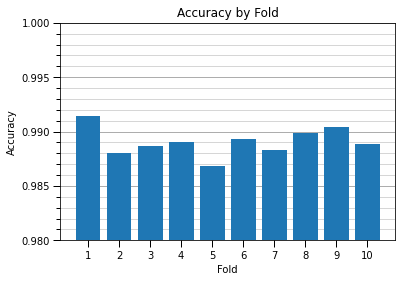

In [67]:
x_fold = range(1, 11)
y_fold_acc = acc_per_fold

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.bar(x_fold, y_fold_acc)

# Title and Axes
ax.set_title("Accuracy by Fold")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")

# Major & Minor Ticks
ax.set_xticks(x_fold)
ax.set_ylim(0.98, 1)
ax.set_yticks(np.arange(0.98, 1.00, step=0.005))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

# Grid
plt.grid(which="major", axis="y", color="#000", alpha=0.4)
plt.grid(which="minor", axis="y", color="#000", alpha=0.2)
ax.set_axisbelow(True)

# Save and Show
my_path = os.path.abspath('')
plt.savefig(my_path + "\graphs\\acc_by_fold.png", dpi=400)
plt.show()

#### Loss by Fold

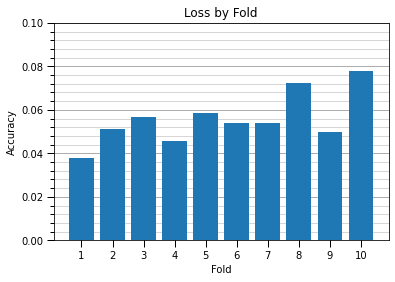

In [68]:
x_fold = range(1, 11)
y_fold_loss = loss_per_fold

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.bar(x_fold, y_fold_loss)

# Title and Axes
ax.set_title("Loss by Fold")
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy")

# Major & Minor Ticks
ax.set_xticks(x_fold)
ax.set_ylim(top=0.09)
ax.set_yticks(np.arange(0, 0.11, step=0.02))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

# Grid
plt.grid(which="major", axis="y", color="#000", alpha=0.4)
plt.grid(which="minor", axis="y", color="#000", alpha=0.2)
ax.set_axisbelow(True)

# Save and Show
my_path = os.path.abspath('')
plt.savefig(my_path + "\graphs\\loss_by_fold.png", dpi=400)
plt.show()

## Epoch Metrics by Fold

### Accuracy vs. Epoch by Fold

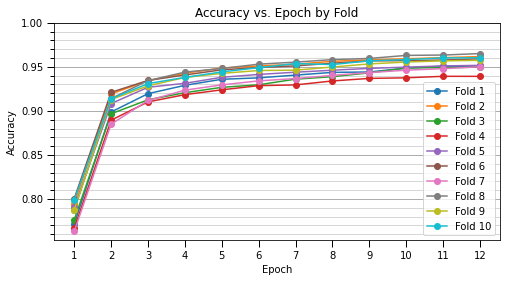

In [69]:
x_epochs = range(1, 13) # 1-12 epochs

fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor("white")

for i in range(0, fold_no-1):
  ax.plot(x_epochs, training_metrics[i]["accuracy"], "-o", label=f"Fold {i+1}")

# Title and Axes Titles
ax.set_title("Accuracy vs. Epoch by Fold")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

# Major & Minor Ticks
ax.set_xticks(x_epochs)
ax.set_ylim(top=1)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

# Grid
plt.grid(which="major", axis="y", color="#000", alpha=0.4)
plt.grid(which="minor", axis="y", color="#000", alpha=0.2)
ax.set_axisbelow(True)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Save and Show
my_path = os.path.abspath('')
plt.savefig(my_path + "\graphs\\acc_vs_epoch_by_fold.png", dpi=400)
plt.show()

### Loss vs. Epoch by Fold

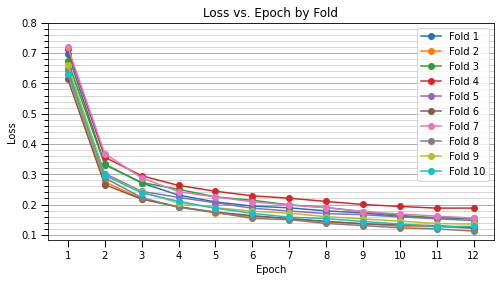

In [70]:
x_epochs = range(1, 13) # 1-12 epochs

fig, ax = plt.subplots(figsize=(8, 4))
fig.set_facecolor("white")

for i in range(0, fold_no-1):
  ax.plot(x_epochs, training_metrics[i]["loss"], "-o", label=f"Fold {i+1}")

# Title and Axes Titles
ax.set_title("Loss vs. Epoch by Fold")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

# Major & Minor Ticks
ax.set_xticks(x_epochs)
ax.set_ylim(top=0.8)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

# Grid
plt.grid(which="major", axis="y", color="#000", alpha=0.4)
plt.grid(which="minor", axis="y", color="#000", alpha=0.2)
ax.set_axisbelow(True)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Save and Show
my_path = os.path.abspath('')
plt.savefig(my_path + "\graphs\\loss_vs_epoch_by_fold.png", dpi=400)
plt.show()